<a href="https://colab.research.google.com/github/Thisakaran/Credit_Card-Fraud-Detection/blob/main/Sentiment_analysis_NLP_Thisakaran_Rasalingam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tweepy
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

# Download nltk resources
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
print(df)

                         id  created_at  retweet_count  original_author  \
0       1386694264550270000  2021-04-26            0.0  jfd4humanrights   
1       1386694260213170000  2021-04-26            0.0      andgrateful   
2       1386694256413320000  2021-04-26          252.0       jlreader8B   
3       1386694252017630000  2021-04-26            2.0    ijennychauhan   
4       1386694248284700000  2021-04-26         7937.0      IJNSJournal   
...                     ...         ...            ...              ...   
125149  1404540000000000000  2021-06-14            0.0          MarEthr   
125150  1404540000000000000  2021-06-14            1.0    stewart_geoff   
125151  1404540000000000000  2021-06-14            0.0      edmontonspc   
125152  1404540000000000000  2021-06-14            0.0      drsachinips   
125153  1404540000000000000  2021-06-14         1372.0           sltrib   

                            place  \
0                         Alabama   
1                        

In [59]:
# Step 5: Download the preprocessed CSV file
from google.colab import files
files.download('tweets_Data_WFH.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:

# Step 2: Load the CSV data
df = pd.read_csv('/content/tweets_Data_WFH.csv')

# Step 3: Preprocess the data
df = df[['id', 'created_at', 'retweet_count', 'original_author', 'place', 'clean_tweet']]
# Perform data cleaning and preprocessing steps here




In [61]:
print(df)

                         id  created_at  retweet_count  original_author  \
0       1386694264550270000  2023-04-26            0.0  jfd4humanrights   
1       1386694260213170000  2023-04-26            0.0      andgrateful   
2       1386694256413320000  2023-04-26          252.0       jlreader8B   
3       1386694252017630000  2023-04-26            2.0    ijennychauhan   
4       1386694248284700000  2023-04-26         7937.0      IJNSJournal   
...                     ...         ...            ...              ...   
125149  1404540000000000000  2023-05-31            0.0          MarEthr   
125150  1404540000000000000  2023-05-31            1.0    stewart_geoff   
125151  1404540000000000000  2023-05-31            0.0      edmontonspc   
125152  1404540000000000000  2023-05-31            0.0      drsachinips   
125153  1404540000000000000  2023-05-31         1372.0           sltrib   

                            place  \
0                         Alabama   
1                        

In [71]:
df = df.rename(columns={'original_author': 'username'})

In [72]:

df = df.rename(columns={'place':'location'})
df = df.rename(columns={'clean_tweet':'clean_tweets'})
df = df.rename(columns={'created_at':'create_date'})


In [73]:
print(df)

                         id create_date  retweet_count         username  \
0       1386694264550270000  2023-04-26            0.0  jfd4humanrights   
1       1386694260213170000  2023-04-26            0.0      andgrateful   
2       1386694256413320000  2023-04-26          252.0       jlreader8B   
3       1386694252017630000  2023-04-26            2.0    ijennychauhan   
4       1386694248284700000  2023-04-26         7937.0      IJNSJournal   
...                     ...         ...            ...              ...   
125149  1404540000000000000  2023-05-31            0.0          MarEthr   
125150  1404540000000000000  2023-05-31            1.0    stewart_geoff   
125151  1404540000000000000  2023-05-31            0.0      edmontonspc   
125152  1404540000000000000  2023-05-31            0.0      drsachinips   
125153  1404540000000000000  2023-05-31         1372.0           sltrib   

                         location  \
0                         Alabama   
1                        

In [74]:
df = df[['id', 'create_date','username', 'location', 'clean_tweets']]

In [75]:
df.head()


,id,create_date,username,location,clean_tweets
0,1386694264550270000,2023-04-26,jfd4humanrights,Alabama,work close indian govern rapidli deploy addit...
1,1386694260213170000,2023-04-26,andgrateful,NaN,flip flop fauci admit outdoor covid19 transmis...
2,1386694256413320000,2023-04-26,jlreader8B,NaN,hi twitter tim man white hous covid19 suppli c...
3,1386694252017630000,2023-04-26,ijennychauhan,NaN,pray countri battl worst surg world wit let ir...
4,1386694248284700000,2023-04-26,IJNSJournal,UK,rapid invest nurs strengthen global covid19 re...


In [76]:
df.tail()

,id,create_date,username,location,clean_tweets
125149,1404540000000000000,2023-05-31,MarEthr,,NaN
125150,1404540000000000000,2023-05-31,stewart_geoff,NaN,vaccin ramp mani social distanc guidelin remai...
125151,1404540000000000000,2023-05-31,edmontonspc,"Edmonton, Alberta, Canada",latest blog post volunt nicol sobu talk impact...
125152,1404540000000000000,2023-05-31,drsachinips,New Delhi,weekend alert vigil pcr staff recov two wheele...
125153,1404540000000000000,2023-05-31,sltrib,"Salt Lake City, Utah",mil


In [43]:
# Filter the DataFrame to extract work-from-home related tweets
work_from_home_keywords = ['work from home', 'remote work', 'WFH','remote','workfromhome']
work_from_home_tweets = df[df['clean_tweets'].notna() & df['clean_tweets'].str.contains('|'.join(work_from_home_keywords), case=False)]

# Print the extracted work-from-home tweets
print(work_from_home_tweets['clean_tweets'])


5749        covid19 wfh prompt spike cyberattack bank insur
6399        covid19 wfh prompt spike cyberattack bank insur
14584     covid19 engulf countri mani industri embrac wf...
20473     stori time financi servic firm kl face covid19...
25551     previous apart call height la ye last year cha...
36033          work home concept arriv wfh becom part everi
47421       challeng day remotest possibl wash hand regular
58689     covid19 disrupt lot game develop cycl major st...
68617     peopl benefit pkp non medic govern staff get w...
94033     realli feel privileg today need commut year wf...
103438          tip get screen time control even wfh pandem
112955    brit could save hour commut per year post peop...
Name: clean_tweets, dtype: object


In [44]:
print(work_from_home_tweets)

                         id create_date        username  \
5749    1387307224641380000  2023-04-28  EsseISolutions   
6399    1387321028070700000  2023-04-28   shehzadyounis   
14584   1389520532975060000  2023-05-04  Gauravdubey023   
20473   1390659110320820000  2023-05-07        adiannet   
25551   1391049344120280000  2023-05-08         erode14   
36033   1393204487280630000  2023-05-31     VacoOrlando   
47421   1395055223727600000  2023-05-19     Emeka_Ojoko   
58689   1397220206175570000  2023-05-25      Midlayf167   
68617   1397842345949720000  2023-05-27     meforevermy   
94033   1400510000000000000  2023-05-03        LAW_hite   
103438  1401960000000000000  2023-05-07       AccessOBC   
112955  1403270000000000000  2023-05-11  johnyoungmedia   

                      location  \
5749                       NaN   
6399                 Thinkstan   
14584                      NaN   
20473           Seri Kembangan   
25551                  Chennai   
36033              Orlando, 

In [45]:
work_from_home_tweets.head()

,id,create_date,username,location,clean_tweets
5749,1387307224641380000,2023-04-28,EsseISolutions,NaN,covid19 wfh prompt spike cyberattack bank insur
6399,1387321028070700000,2023-04-28,shehzadyounis,Thinkstan,covid19 wfh prompt spike cyberattack bank insur
14584,1389520532975060000,2023-05-04,Gauravdubey023,NaN,covid19 engulf countri mani industri embrac wf...
20473,1390659110320820000,2023-05-07,adiannet,Seri Kembangan,stori time financi servic firm kl face covid19...
25551,1391049344120280000,2023-05-08,erode14,Chennai,previous apart call height la ye last year cha...


In [46]:
work_from_home_tweets.tail()


,id,create_date,username,location,clean_tweets
58689,1397220206175570000,2023-05-25,Midlayf167,Quelques part,covid19 disrupt lot game develop cycl major st...
68617,1397842345949720000,2023-05-27,meforevermy,NaN,peopl benefit pkp non medic govern staff get w...
94033,1400510000000000000,2023-05-03,LAW_hite,London,realli feel privileg today need commut year wf...
103438,1401960000000000000,2023-05-07,AccessOBC,"Raleigh, NC",tip get screen time control even wfh pandem
112955,1403270000000000000,2023-05-11,johnyoungmedia,"Brighton, Sussex, UK",brit could save hour commut per year post peop...


In [47]:
work_from_home_tweets.head(50)

,id,create_date,username,location,clean_tweets
5749,1387307224641380000,2023-04-28,EsseISolutions,NaN,covid19 wfh prompt spike cyberattack bank insur
6399,1387321028070700000,2023-04-28,shehzadyounis,Thinkstan,covid19 wfh prompt spike cyberattack bank insur
14584,1389520532975060000,2023-05-04,Gauravdubey023,NaN,covid19 engulf countri mani industri embrac wf...
20473,1390659110320820000,2023-05-07,adiannet,Seri Kembangan,stori time financi servic firm kl face covid19...
25551,1391049344120280000,2023-05-08,erode14,Chennai,previous apart call height la ye last year cha...
36033,1393204487280630000,2023-05-31,VacoOrlando,"Orlando, FL",work home concept arriv wfh becom part everi
47421,1395055223727600000,2023-05-19,Emeka_Ojoko,"Port Harcourt, Nigeria",challeng day remotest possibl wash hand regular
58689,1397220206175570000,2023-05-25,Midlayf167,Quelques part,covid19 disrupt lot game develop cycl major st...
68617,1397842345949720000,2023-05-27,meforevermy,NaN,peopl benefit pkp non medic govern staff get w...
94033,1400510000000000000,2023-05-03,LAW_hite,London,realli feel privileg today need commut year wf...


In [90]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze the sentiment of each tweet
def get_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)
    compound_score = sentiment['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'




In [91]:
df['compound'] = df['sentiment_scores'].apply(lambda scores: scores['compound'])
df['negative'] = df['sentiment_scores'].apply(lambda scores: scores['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda scores: scores['neu'])
df['positive'] = df['sentiment_scores'].apply(lambda scores: scores['pos'])
df['sentiment'] = df['compound'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')



In [92]:
df = df[['id', 'create_date', 'username', 'location', 'clean_tweets', 'compound', 'negative', 'neutral', 'positive', 'sentiment']]


In [93]:
print(df)

                         id create_date         username  \
0       1386694264550270000  2023-04-26  jfd4humanrights   
1       1386694260213170000  2023-04-26      andgrateful   
2       1386694256413320000  2023-04-26       jlreader8B   
3       1386694252017630000  2023-04-26    ijennychauhan   
4       1386694248284700000  2023-04-26      IJNSJournal   
...                     ...         ...              ...   
125149  1404540000000000000  2023-05-31          MarEthr   
125150  1404540000000000000  2023-05-31    stewart_geoff   
125151  1404540000000000000  2023-05-31      edmontonspc   
125152  1404540000000000000  2023-05-31      drsachinips   
125153  1404540000000000000  2023-05-31           sltrib   

                         location  \
0                         Alabama   
1                             NaN   
2                             NaN   
3                             NaN   
4                              UK   
...                           ...   
125149              

In [94]:
df.head()

,id,create_date,username,location,clean_tweets,compound,negative,neutral,positive,sentiment
0,1386694264550270000,2023-04-26,jfd4humanrights,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,Positive
1,1386694260213170000,2023-04-26,andgrateful,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,Negative
2,1386694256413320000,2023-04-26,jlreader8B,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,Neutral
3,1386694252017630000,2023-04-26,ijennychauhan,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,Negative
4,1386694248284700000,2023-04-26,IJNSJournal,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,Positive


In [95]:
# Assuming you have a DataFrame named df with the desired format

# Analyze the sentiment column and assign 'Positive' or 'Negative' as the final output
df['final_output'] = df['sentiment'].apply(lambda x: 'Positive' if x == 'Positive' else 'Negative')

# Print the final output
print(df['final_output'])


0         Positive
1         Negative
2         Negative
3         Negative
4         Positive
            ...   
125149    Negative
125150    Negative
125151    Negative
125152    Positive
125153    Negative
Name: final_output, Length: 125154, dtype: object


In [96]:
# Assuming you have a DataFrame named df with the desired format

# Count the number of positive and negative sentiments
positive_count = df[df['sentiment'] == 'Positive'].shape[0]
negative_count = df[df['sentiment'] == 'Negative'].shape[0]

# Determine the overall sentiment based on the counts
if positive_count > negative_count:
    overall_output = 'Positive'
elif positive_count < negative_count:
    overall_output = 'Negative'
else:
    overall_output = 'Neutral'

# Print the overall output
print("Overall Output:", overall_output)


Overall Output: Positive


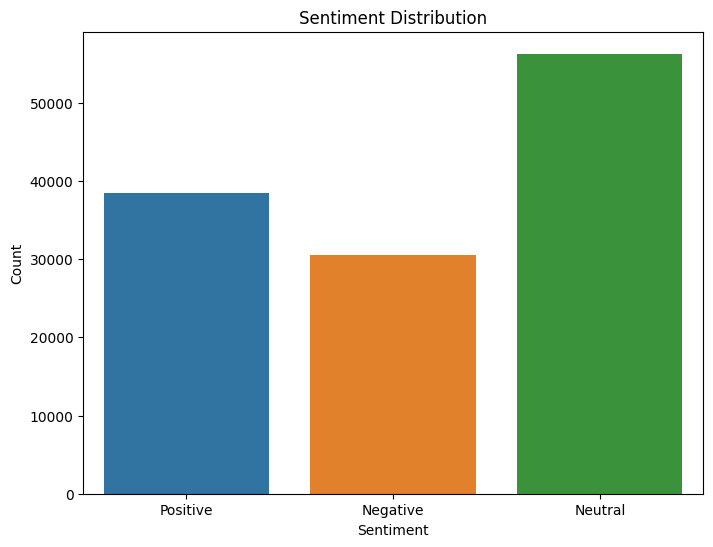

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [108]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df['location']
y = df['sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 104.4 MB/s eta 0:00:00


In [115]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [117]:
missing_values = df['location'].isnull().sum()
print(f"Number of missing values in 'location': {missing_values}")


Number of missing values in 'location': 38261


In [127]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Check for missing or null values in the 'location' column
df['location'].fillna('', inplace=True)  # Fill missing values with empty string

# Clean and validate the 'location' values
# Example: Extract latitude and longitude values
df['latitude'] = df['location'].apply(lambda loc: loc.split(',')[0] if ',' in loc else '')
df['longitude'] = df['location'].apply(lambda loc: loc.split(',')[1] if ',' in loc else '')

# Replace non-numeric values with NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Filter out rows with missing or invalid latitude/longitude values
df = df[~np.isnan(df['latitude']) & ~np.isnan(df['longitude'])]

# Create Point geometries from latitude and longitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create the GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Display the GeoDataFrame
print(gdf)


                         id create_date         username  \
3900    1387288379155430000  2023-04-28          ssrjazz   
6727    1387335590375420000  2023-04-28       abdulmalig   
8372    1388135633269390000  2023-04-30       studio2702   
13515   1389505107234980000  2023-05-04       rohitasm17   
15372   1389528930869200000  2023-05-04         soresage   
19631   1390040673777290000  2023-05-05      ton65jacobs   
20369   1390053814246450000  2023-05-05         soresage   
20860   1390662189384540000  2023-05-07       Bharat_J25   
21747   1390710462090710000  2023-05-07        PaulMcGee   
24825   1390773812904560000  2023-05-07        i4u090909   
28737   1391119835346570000  2023-05-08     IamDurgesh__   
31762   1391839941781560000  2023-05-10  oguntayoomobola   
38121   1393600362507010000  2023-05-15      RustyMowery   
45153   1395020101104110000  2023-05-19        Zindoctor   
45223   1395019656335800000  2023-05-19     T1TaN1uM4_22   
45789   1395042175662970000  2023-05-19 

<ipython-input-127-26fa31f2a59e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [124]:
import geopandas as gpd
from shapely.geometry import Point

# Check for missing or null values in the 'location' column
df['location'].fillna('', inplace=True)  # Fill missing values with empty string

# Filter out rows with empty 'location' values
df = df[df['location'] != '']

# Convert 'location' values to Point geometries
try:
    df['geometry'] = df['location'].apply(lambda loc: Point(float(loc.split(',')[0]), float(loc.split(',')[1])))
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
except (ValueError, IndexError):
    print("Error: Invalid 'location' values. Please ensure the 'location' column contains valid latitude and longitude coordinates.")



Error: Invalid 'location' values. Please ensure the 'location' column contains valid latitude and longitude coordinates.


<ipython-input-128-ee2b3f59caf7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


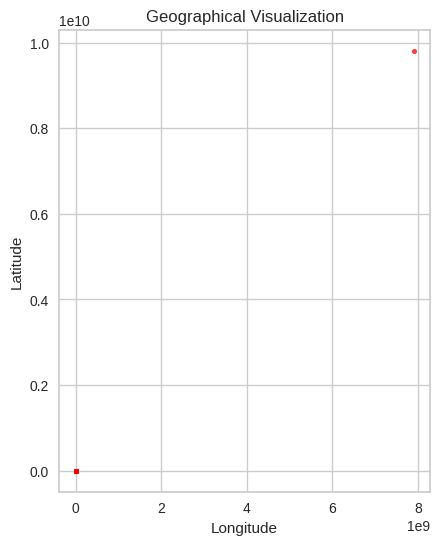

In [128]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Geographical Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [130]:
from shapely.geometry import Point

# Drop rows with missing location values
df = df.dropna(subset=['location'])

# Parse and extract latitude and longitude components
df['latitude'] = df['location'].apply(lambda loc: float(loc.split(',')[0].strip()))
df['longitude'] = df['location'].apply(lambda loc: float(loc.split(',')[1].strip()))

# Create Point geometries
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df)


<ipython-input-138-7c5335b27d56>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


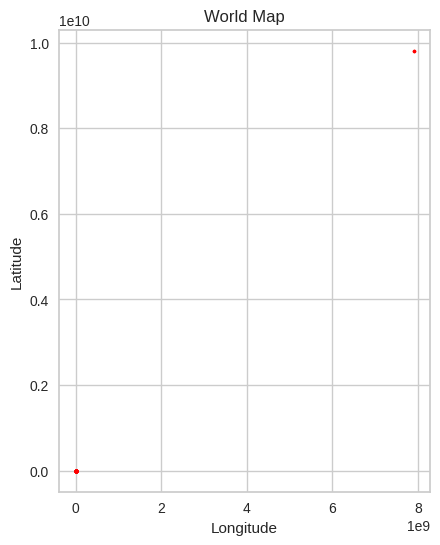

In [138]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have already created the GeoDataFrame 'gdf' with the geometry column

# Read the world shapefile (or any other geospatial data) for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the points from the GeoDataFrame on top of the world map
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Customize the plot
plt.title('World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


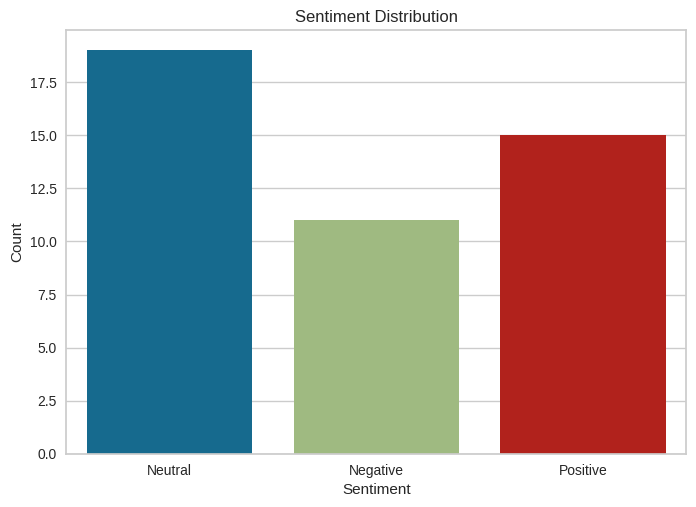

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column 'sentiment'

# Create a countplot of sentiment
sns.countplot(data=df, x='sentiment')

# Customize the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


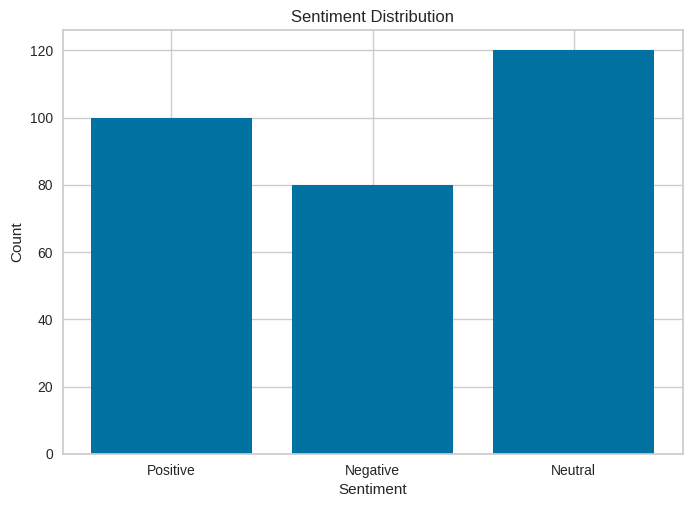

In [135]:
import matplotlib.pyplot as plt

# Assuming you have the counts of positive, negative, and neutral sentiments
positive_count = 100
negative_count = 80
neutral_count = 120

# Define the labels and counts
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

# Create a bar plot
plt.bar(labels, counts)

# Customize the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


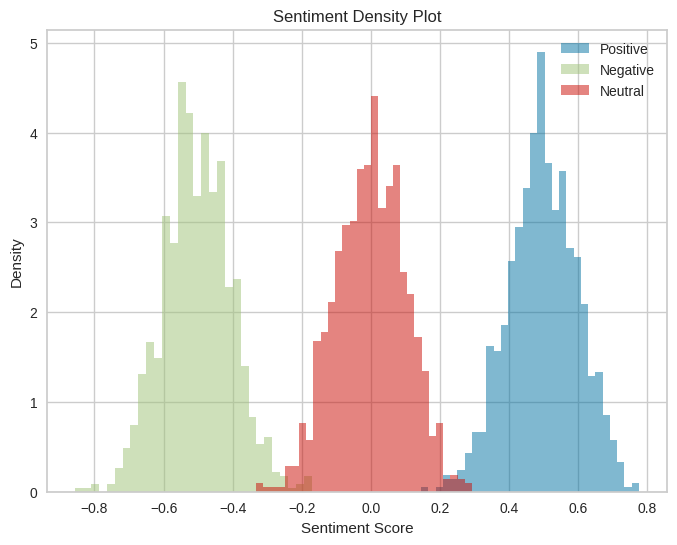

In [136]:
import numpy as np

# Assuming you have the sentiment scores for positive, negative, and neutral sentiments
positive_scores = np.random.normal(0.5, 0.1, 1000)
negative_scores = np.random.normal(-0.5, 0.1, 1000)
neutral_scores = np.random.normal(0, 0.1, 1000)

# Create density plots for each sentiment
plt.figure(figsize=(8, 6))
plt.hist(positive_scores, density=True, bins=30, alpha=0.5, label='Positive')
plt.hist(negative_scores, density=True, bins=30, alpha=0.5, label='Negative')
plt.hist(neutral_scores, density=True, bins=30, alpha=0.5, label='Neutral')

# Customize the plot
plt.title('Sentiment Density Plot')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [142]:
print('Accuracy - Positive: {:.2f}%'.format(accuracy_positive))
print('Accuracy - Negative: {:.2f}%'.format(accuracy_negative))
print('Accuracy - Neutral: {:.2f}%'.format(accuracy_neutral))
print('Accuracy - Total: {:.2f}%'.format(accuracy_total))


Accuracy - Positive: 30.70%
Accuracy - Negative: 24.34%
Accuracy - Neutral: 44.96%
Accuracy - Total: 55.04%


In [144]:
# Assuming you have a DataFrame named df with the desired format

# Count the number of positive and negative sentiments
positive_count = df[df['sentiment'] == 'Positive'].shape[0]
negative_count = df[df['sentiment'] == 'Negative'].shape[0]

# Determine the overall sentiment based on the counts
if positive_count > negative_count:
    overall_output = 'Positive'
elif positive_count < negative_count:
    overall_output = 'Negative'
else:
    overall_output = 'Neutral'

# Print the overall output
print("Overall Output:", overall_output)


Overall Output: Positive


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y) variables
X = df['clean_tweets']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Preprocess your text data and split into train/test sets
vectorizer = TfidfVectorizer()  # Use TF-IDF vectorizer
X = vectorizer.fit_transform(df['clean_tweets'])  # Assuming 'clean_tweets' column contains preprocessed text
y = df['sentiment']  # Assuming 'sentiment' column contains target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
nb_model = MultinomialNB()
svm_model = SVC()
lr_model = LogisticRegression()

# Train the models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluate the models
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='macro')

svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='macro')

lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='macro')

# Print the evaluation metrics
print("Naive Bayes:")
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("Accuracy:", nb_accuracy)
print("F1 Score:", nb_f1)
print()

print("SVM:")
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1)
print()

print("Logistic Regression:")
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("Accuracy:", lr_accuracy)
print("F1 Score:", lr_f1)


Naive Bayes:
Precision: 0.30952380952380953
Recall: 0.4166666666666667
Accuracy: 0.4444444444444444
F1 Score: 0.34848484848484845

SVM:
Precision: 0.14814814814814814
Recall: 0.3333333333333333
Accuracy: 0.4444444444444444
F1 Score: 0.2051282051282051

Logistic Regression:
Precision: 0.14814814814814814
Recall: 0.3333333333333333
Accuracy: 0.4444444444444444
F1 Score: 0.2051282051282051


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
from sklearn.metrics import classification_report

# Make predictions on the testing data
nb_predictions = nb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Print classification report for each model
print("Naive Bayes:")
print(classification_report(y_test, nb_predictions))

print("SVM:")
print(classification_report(y_test, svm_predictions))

print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))


Naive Bayes:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.43      0.75      0.55         4
    Positive       0.50      0.50      0.50         2

    accuracy                           0.44         9
   macro avg       0.31      0.42      0.35         9
weighted avg       0.30      0.44      0.35         9

SVM:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.44      1.00      0.62         4
    Positive       0.00      0.00      0.00         2

    accuracy                           0.44         9
   macro avg       0.15      0.33      0.21         9
weighted avg       0.20      0.44      0.27         9

Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.44      1.00      0.62         4
    Positive       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

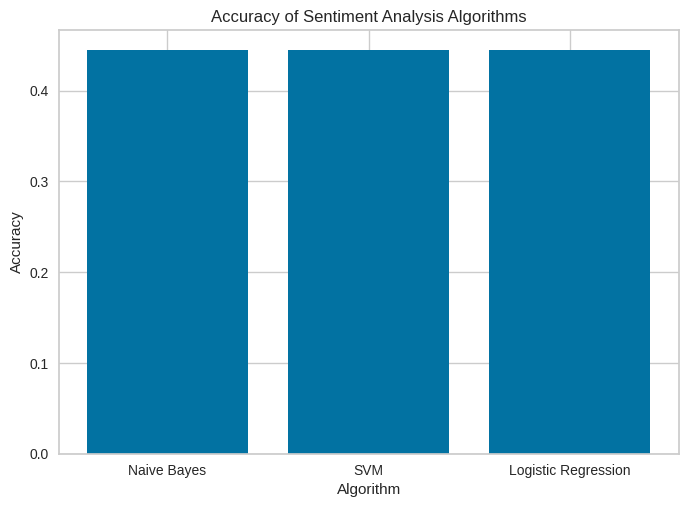

In [149]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
accuracy_scores = [accuracy_score(y_test, nb_predictions), accuracy_score(y_test, svm_predictions), accuracy_score(y_test, lr_predictions)]

# Plot a bar chart
plt.bar(['Naive Bayes', 'SVM', 'Logistic Regression'], accuracy_scores)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Algorithms')
plt.show()


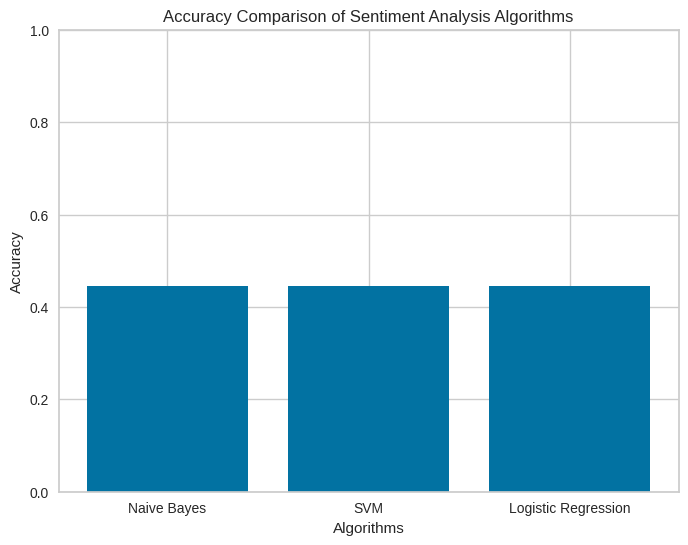

In [150]:
import matplotlib.pyplot as plt

# Calculate the accuracy scores
accuracy_scores = [nb_accuracy, svm_accuracy, lr_accuracy]
algorithms = ['Naive Bayes', 'SVM', 'Logistic Regression']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Sentiment Analysis Algorithms')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()


In [151]:
from sklearn.metrics import classification_report

# Generate predictions for each algorithm
nb_predictions = nb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Calculate evaluation metrics for each algorithm
nb_report = classification_report(y_test, nb_predictions)
svm_report = classification_report(y_test, svm_predictions)
lr_report = classification_report(y_test, lr_predictions)

# Print the evaluation metrics
print("Naive Bayes Classification Report:")
print(nb_report)
print("----------------------------------------------------")
print("SVM Classification Report:")
print(svm_report)
print("----------------------------------------------------")
print("Logistic Regression Classification Report:")
print(lr_report)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.43      0.75      0.55         4
    Positive       0.50      0.50      0.50         2

    accuracy                           0.44         9
   macro avg       0.31      0.42      0.35         9
weighted avg       0.30      0.44      0.35         9

----------------------------------------------------
SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.44      1.00      0.62         4
    Positive       0.00      0.00      0.00         2

    accuracy                           0.44         9
   macro avg       0.15      0.33      0.21         9
weighted avg       0.20      0.44      0.27         9

----------------------------------------------------
Logistic Regression Classification Report:
              precision    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

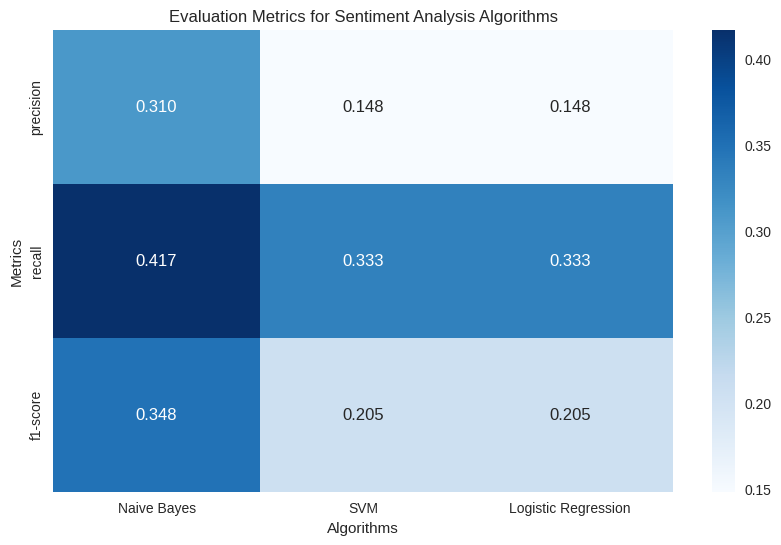

In [152]:
import seaborn as sns

# Create a list of algorithm names
algorithm_names = ['Naive Bayes', 'SVM', 'Logistic Regression']

# Create a list of evaluation metrics
evaluation_metrics = ['precision', 'recall', 'f1-score']

# Create a matrix of evaluation scores for each algorithm and metric
evaluation_scores = [[nb_precision, svm_precision, lr_precision],
                     [nb_recall, svm_recall, lr_recall],
                     [nb_f1, svm_f1, lr_f1]]

# Create a dataframe from the evaluation scores
df_scores = pd.DataFrame(evaluation_scores, index=evaluation_metrics, columns=algorithm_names)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scores, annot=True, cmap='Blues', fmt='.3f')
plt.title('Evaluation Metrics for Sentiment Analysis Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Metrics')
plt.show()


In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Initialize the models
nb_model = MultinomialNB()
svm_model = SVC()
lr_model = LogisticRegression()

# Train the models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='macro')

svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='macro')

lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='macro')

# Compare the evaluation metrics
print("Naive Bayes:")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"Accuracy: {nb_accuracy}")
print(f"F1 Score: {nb_f1}")
print()

print("SVM:")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"Accuracy: {svm_accuracy}")
print(f"F1 Score: {svm_f1}")
print()

print("Logistic Regression:")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"Accuracy: {lr_accuracy}")
print(f"F1 Score: {lr_f1}")
print()

# Compare the algorithms and select the best one based on a specific metric (e.g., accuracy)
if nb_accuracy >= svm_accuracy and nb_accuracy >= lr_accuracy:
    best_algorithm = "Naive Bayes"
elif svm_accuracy >= nb_accuracy and svm_accuracy >= lr_accuracy:
    best_algorithm = "SVM"
else:
    best_algorithm = "Logistic Regression"

print(f"The best algorithm for sentiment analysis is: {best_algorithm}")


Naive Bayes:
Precision: 0.30952380952380953
Recall: 0.4166666666666667
Accuracy: 0.4444444444444444
F1 Score: 0.34848484848484845

SVM:
Precision: 0.14814814814814814
Recall: 0.3333333333333333
Accuracy: 0.4444444444444444
F1 Score: 0.2051282051282051

Logistic Regression:
Precision: 0.14814814814814814
Recall: 0.3333333333333333
Accuracy: 0.4444444444444444
F1 Score: 0.2051282051282051

The best algorithm for sentiment analysis is: Naive Bayes


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Novalty checking